In [508]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
output_notebook()
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.width',None)

Loading BokehJS ...

Cohort Analysis:

Enables the business to customize the pricing strategy and reinvent their products if required.
Cohort analysis compare metrics across product lifecycle.
It also compare metrics across customer lifecycle.

Time Cohort - :
Time cohort are the customers who signed up for a product or service for a specific amount of time. Analysing these cohort gives us insight about how they enjoy using the products at that time frame.

Behaviour cohort - :
Behaviour cohort are the customers who signed up for a product in the past and continue to use those kind of products in the coming time.

Size cohort - :
This depics the size of the customers who are signed of for a particular product. Change in this cohort has direct implications on the revenue generated.



We will segment customers in the cohort based on the month they made their first purchase. Then we will assign the cohort index to each purchase of the customer to represent the number of months since the first transaction.

In [509]:
# Reading the data
online = pd.read_csv('online_c1.csv')
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

        InvoiceDate  UnitPrice  CustomerID         Country  
0   10/25/2011 8:26       2.10       14286  United Kingdom  
1  11/20/2011 11:56       1.45       16360  United Kingdom  
2   7/14/2011 13:35       3.75       13933  United Kingdom  
3  11/23/2011 15:53       2.10       17290  United Kingdom  
4   5/25/2011 13:36       5.95       17663  United Kingdom  


In [510]:
# Defining a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

def get_day_first(x): return dt.datetime(x.year, x.month, 1) 

# Defining a function that will return date in the for of year, month and day
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Function to create the dataframe
def create_excel_from_text(name):
     # Cleaning the 2017 dataset
    dataset = pd.read_excel(name)

    # Sorting the columns
    columns = list(dataset.columns)
    text = columns[0]
    array = text.split("  ")
    column_list = []
    for item in array:
        if len(item) > 0:
            column_list.append(item.strip())

    # Sorting rest of the data
    complete_data = []

    for i in range(1,len(dataset)+1):
        n = list(dataset.iloc[i:i+1,0])
        if len(n) > 0:
            array = n[0].split(" ")
            temp_list = []
            for item_index in range(1, len(array)):
                if len(array[item_index]) > 0:
                    temp_list.append(array[item_index].strip())
        complete_data.append(temp_list)

    dataframe = pd.DataFrame(complete_data, columns = column_list)
    return dataframe

# Creating InvoiceDay column
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Grouping by CustomerID and selecting the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assigning a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# Viewing the top 5 rows
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

   CohortDay  
0 2011-04-11  
1 2011-09-12  
2 2011-07-14  
3 

In [511]:
# Calculating the time offset

# Geting the integers for date parts from the InvoiceDaycolumn
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Getting the integers for date parts from the CohortDay column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

# Calculating difference in years
years_diff = invoice_year - cohort_year

# Calculating difference in months
months_diff = invoice_month - cohort_month

# Calculating difference in days
days_diff = invoice_day - cohort_day

online['CohortMonth'] = online['CohortDay'].apply(get_day_first)
online['InvoiceMonth'] = online['InvoiceDay'].apply(get_day_first)

# Extracting the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff + 1

print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

   CohortDay CohortMonth InvoiceMonth  CohortIndex  
0 2011-04

Retention:
Retention is the percentage of active customers compared to the total number of customers.


Creating the retention matrix - :

In [512]:
online = online.rename(columns = {'Unnamed: 0' : 'IndexColumn'})

# Counting the number of unique values per customer ID
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

# Creating a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Selecting the first column and storing it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Dividing the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

Calculating the average price

In [513]:
# Creating a groupby object and passing the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculating the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Resetting the index of cohort_data
cohort_data = cohort_data.reset_index()

# Creating a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_quantity.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01   3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01-01   3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02-01   3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03-01   3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04-01   3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05-01   3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06-01   2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07-01   3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08-01   2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09-01   2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10-01   2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

Building the heatmap using seaborn

CohortIndex        1         2         3         4         5         6   \
CohortMonth                                                               
2010-12-01   3.035915  3.044060  2.995071  2.835175  2.727067  6.915204   
2011-01-01   3.162917  3.141353  2.958424  3.008941  3.131221  3.031010   
2011-02-01   3.086426  3.953403  3.307352  2.916895  3.280114  2.921393   
2011-03-01   3.528781  3.621809  3.509201  2.760234  2.737149  2.471535   
2011-04-01   3.295611  4.440175  3.413277  2.584912  2.843745  2.780612   

CohortIndex        7         8         9         10        11        12  \
CohortMonth                                                               
2010-12-01   2.799492  2.975229  2.723557  2.662417  2.969708  2.835004   
2011-01-01   2.965248  2.462527  2.712411  2.920199  2.551068  2.008503   
2011-02-01   2.814505  2.680037  2.909025  2.728820  3.084757       NaN   
2011-03-01   2.651238  2.912420  2.537374  2.440047       NaN       NaN   
2011-04-01   2.837995  2

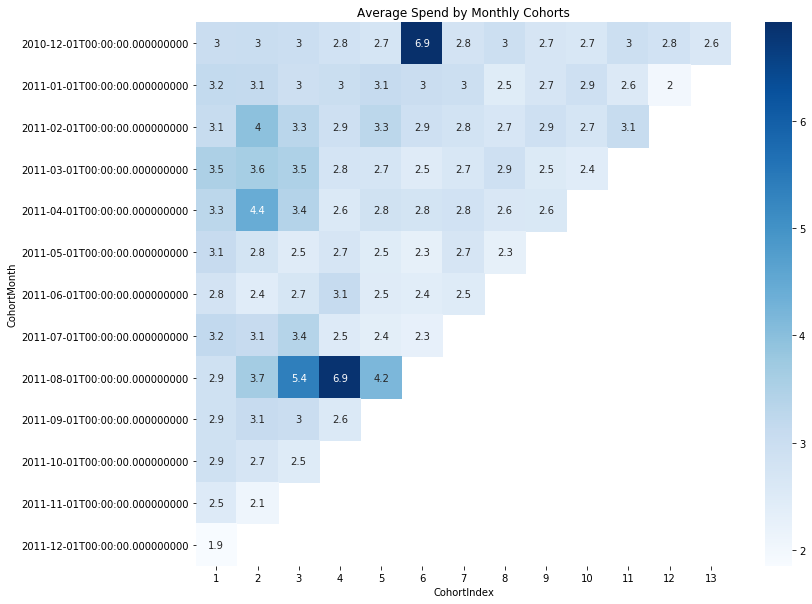

In [514]:
# Initialized an 8 by 6 inches plot figure
plt.figure(figsize=(12, 10))

plt.title('Average Spend by Monthly Cohorts')
print(average_quantity.head())
# Creating the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()

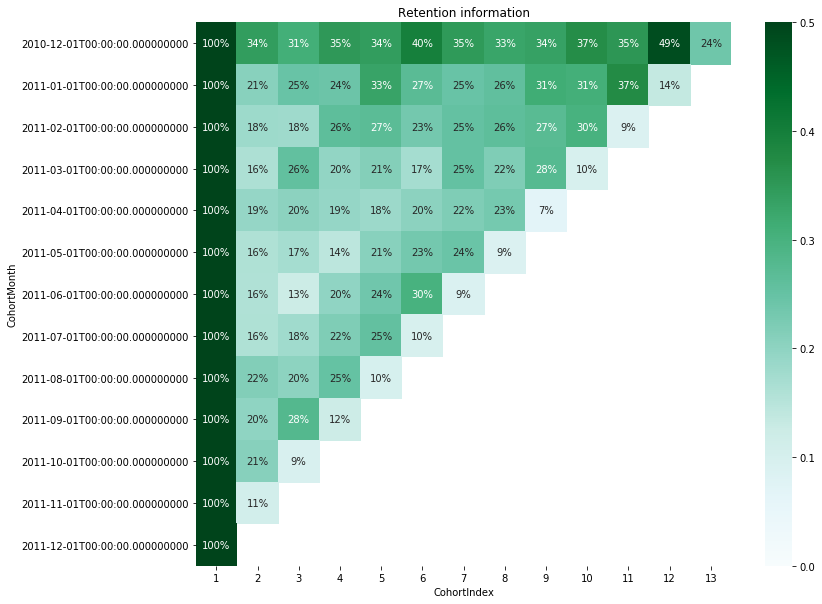

In [515]:
retention.round(3) * 100

grouping = online.groupby(['CohortMonth','CohortIndex'])

cohort_data = grouping['Quantity'].mean()

cohort_data = cohort_data.reset_index()

average_quantity = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'Quantity')

plt.figure(figsize = (12,10))

plt.title("Retention information")

sns.heatmap(data = retention,annot = True, fmt = '.0%',vmin = 0.0, vmax = 0.5, cmap = 'BuGn')

plt.show()

Recency, Frequency and Monetary (RFM) segmentation:

Recency: Days since last customer transaction.
Frequency: Number of transactions in the last 12 months.
Monetary: Total spend in the last 12 months. 

In [516]:
# getting a sample dataframe to work upon the idea of RFM

data = create_excel_from_text('SampleCustomer_c2.xlsx')
data['Spend'] = pd.to_numeric(data['Spend'])
print(data.head())

# Creating a spend quartile with 4 groups - a range between 1 and 5
spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# Assigning the quartile values to the Spend_Quartile column in data
data['Spend_Quartile'] = spend_quartile
print('*************')
# Printing data with sorted Spend values
print(data.sort_values('Spend'))

  CustomerID  Spend
0          1    335
1          2    172
2          3    355
3          4    303
4          5    233
*************
  CustomerID  Spend Spend_Quartile
1          2    172              1
6          7    229              1
7          7    229              1
4          5    233              2
5          6    244              3
3          4    303              3
0          1    335              4
2          3    355              4


In [517]:
data = create_excel_from_text('SampleCustomer_recency_c2.xlsx')
data['Recency_Days'] = pd.to_numeric(data['Recency_Days'])
print(data.head())
# Storing the labels from 4 to 1 in a decreasing order, because the least recent will be our high priority
r_labels = list(range(4, 0, -1))

# Creating a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assigning the quartile values to the Recency_Quartile column in `data`
data['Recency_quartile'] = recency_quartiles 
print('*************')
# Printing `data` with sorted Recency_Days values
print(data.sort_values('Recency_Days'))

  CustomerID  Recency_Days
0          1           235
1          2           396
2          3            72
3          4           255
4          5           393
*************
  CustomerID  Recency_Days Recency_quartile
2          3            72                4
6          7           133                4
7          7           133                4
5          6           203                3
0          1           235                2
3          4           255                2
4          5           393                1
1          2           396                1


In [518]:
# Loading the actual dataset:

online = pd.read_csv('online12M_c2.csv')
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

snapshot_date = '2011-12-10 00:00:00'
snapshot_date = pd.to_datetime(snapshot_date)
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Calculating the Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Renaming the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

print(datamart.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12747             3         25         948.70
12748             1        888        7046.16
12749             4         37         813.45
12820             4         17         268.02
12822            71          9         146.15


Creating the labels for RFM metrics:

In [519]:
# Creating labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assigning these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assigning these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Creating new columns R and F
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

# Creating labels for MonetaryValue 
m_labels = range(1, 4)

# Assigning these labels to three equal percentile groups
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Creating new column M
datamart = datamart.assign(M=m_groups.values)

# Calculating RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

print(datamart['RFM_Score'].head())

CustomerID
12747    9.0
12748    9.0
12749    9.0
12820    9.0
12822    6.0
Name: RFM_Score, dtype: float64


In [520]:
# Defining the rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10)):
        return 'Middle'
    else:
        return 'Low'

# Creating a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

print(datamart.head())

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
12747             3         25         948.70  3  3  3        9.0    Middle
12748             1        888        7046.16  3  3  3        9.0    Middle
12749             4         37         813.45  3  3  3        9.0    Middle
12820             4         17         268.02  3  3  3        9.0    Middle
12822            71          9         146.15  2  2  2        6.0    Middle


Analysing the custom segments:

In [521]:
# Calculating the average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  	# Returning the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Printing the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         153.4       4.4          86.9  1627
Middle       39.6      30.2         599.7  2016


Data-Pre processing for K-Means clustering:
Key assumptions:
1. Symmetric distribution of variables (not skewed)
2. All the variables have the same average values. Each metric has equal weight in k-means calculation.
3. Variances of the variables should be scaled equally.

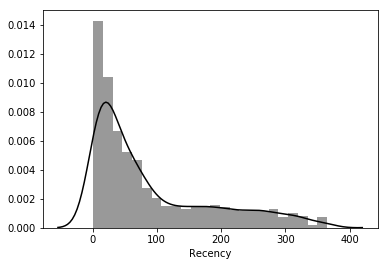

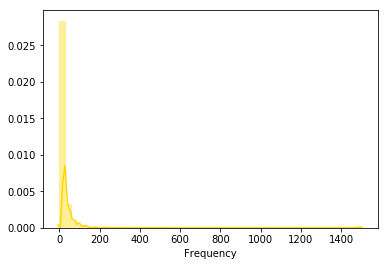

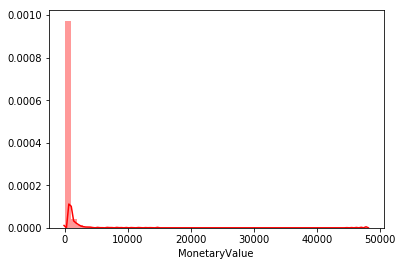

In [522]:
# Visualizing if there is any skewness in the values of RFM metrics
datamart_RFM = datamart[['Recency','Frequency','MonetaryValue']]

sns.distplot(datamart_RFM['Recency'], color="Black")
plt.show()
sns.distplot(datamart_RFM['Frequency'], color="Gold")
plt.show()
sns.distplot(datamart_RFM['MonetaryValue'], color="Red")
plt.show()

All the values are heavily right skewed. We need to remove the skewness before we can proceed.

             Recency  Frequency  MonetaryValue
CustomerID                                    
12747       1.098612   3.218876       6.855093
12748       0.000000   6.788972       8.860238
12749       1.386294   3.610918       6.701284
12820       1.386294   2.833213       5.591062
12822       4.262680   2.197225       4.984633


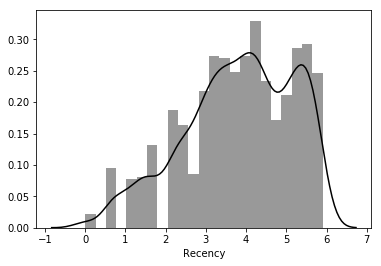

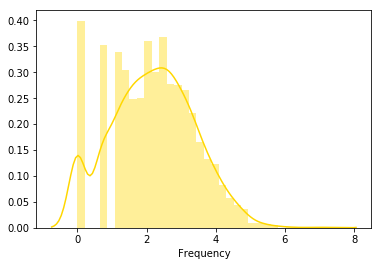

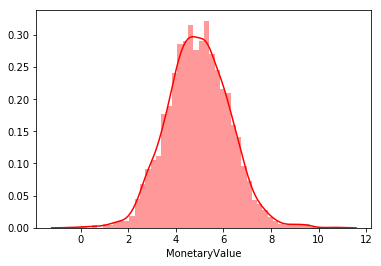

In [523]:
datamart_RFM_log = np.log(datamart_RFM)
datamart_RFM_log = datamart_RFM_log.dropna()

print(datamart_RFM_log.head())

# Viewing the skewness
sns.distplot(datamart_RFM_log['Recency'], color="Black")
plt.show()
sns.distplot(datamart_RFM_log['Frequency'], color="Gold")
plt.show()
sns.distplot(datamart_RFM_log['MonetaryValue'], color="Red")
plt.show()

As we can see the skewness is removed.

In [524]:
# Scaling the mean and the variance so that K-Means clustering would work better
datamart_centered = datamart_RFM_log - datamart_RFM_log.mean()
print(datamart_centered.describe().round(2))

datamart_scaled = datamart_RFM_log / datamart_RFM_log.std()
print(datamart_scaled.describe().round(2))

# The above two lines could be achieved by using the StandardScaler package
print('******************')
scaler = StandardScaler()
scaler.fit(datamart_RFM_log)
datamart_normalized = scaler.transform(datamart_RFM_log)

print('Mean of the array: ', datamart_normalized.mean(axis=0).round(2))
print('Standard deviation of the array: ', datamart_normalized.std(axis=0).round(2))
print('******************')
print('Both the results are same')


       Recency  Frequency  MonetaryValue
count  3643.00    3643.00        3643.00
mean     -0.00      -0.00          -0.00
std       1.35       1.21           1.31
min      -3.81      -2.17          -5.37
25%      -0.86      -0.79          -0.86
50%       0.13       0.03          -0.02
75%       1.13       0.87           0.88
max       2.09       5.14           5.85
       Recency  Frequency  MonetaryValue
count  3643.00    3643.00        3643.00
mean      2.81       1.79           3.76
std       1.00       1.00           1.00
min       0.00       0.00          -0.33
25%       2.18       1.15           3.11
50%       2.91       1.82           3.75
75%       3.65       2.52           4.43
max       4.36       6.04           8.22
******************
Mean of the array:  [-0.  0.  0.]
Standard deviation of the array:  [1. 1. 1.]
******************
Both the results are same


Practical implementation of K-means clustering

In [525]:
# Getting the idea about number of clusters
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

key = list(sse.keys())
value = list(sse.values())
p = figure(x_axis_label = 'No. of clusters(Normalized Data)',y_axis_label = 'SSE', plot_width=400, plot_height=400, background_fill_color = 'aliceblue')

p.line(key, value, line_width=2, color = "black")

p.circle(key, value, fill_color="cyan", size=8)

show(p)

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_RFM)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

key = list(sse.keys())
value = list(sse.values())
p = figure(x_axis_label = 'No. of clusters',y_axis_label = 'SSE',plot_width=400, plot_height=400, background_fill_color = 'aliceblue')

p.line(key, value, line_width=2, color = "black")

p.circle(key, value, fill_color="cyan", size=8)

show(p)

print('The graphs show that it should have minimum of 2 clusters and suggested maximum of 3 clusters.')
print('Howerver, we need to plot both the 2 and 3 clusters and analyse which one makes sense.')

The graphs show that it should have minimum of 2 clusters and suggested maximum of 3 clusters.
Howerver, we need to plot both the 2 and 3 clusters and analyse which one makes sense.


In [526]:
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
print('Clusters defined for the above normalized dataset : ', np.unique(cluster_labels))
datamart_RFM_K2 = datamart_RFM.assign(Cluster = cluster_labels)
print(datamart_RFM_K2.head())

datamart_RFM_K2.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(0)

Clusters defined for the above normalized dataset :  [0 1]
            Recency  Frequency  MonetaryValue  Cluster
CustomerID                                            
12747             3         25         948.70        1
12748             1        888        7046.16        1
12749             4         37         813.45        1
12820             4         17         268.02        1
12822            71          9         146.15        0


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         137.0       5.0          92.0  2023
1          32.0      35.0         719.0  1620

In [527]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
print('Clusters defined for the above normalized dataset : ', np.unique(cluster_labels))
datamart_RFM_K3 = datamart_RFM.assign(Cluster = cluster_labels)
print(datamart_RFM_K3.head())

datamart_RFM_K3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
}).round(0)

Clusters defined for the above normalized dataset :  [0 1 2]
            Recency  Frequency  MonetaryValue  Cluster
CustomerID                                            
12747             3         25         948.70        0
12748             1        888        7046.16        0
12749             4         37         813.45        0
12820             4         17         268.02        0
12822            71          9         146.15        2


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          16.0      50.0        1051.0   901
1         167.0       3.0          53.0  1156
2          77.0      12.0         216.0  1586

Snake Plot : 
* Market research technique to compare different segments
* Visual representation of each segment's attributes
* Need to first normalize data (center & scale)
* Plot each cluster's average normalized values of each attribute


In [528]:
datamart_normalized = pd.DataFrame(datamart_normalized, 
                                   index=datamart_RFM.index, 
                                   columns=datamart_RFM.columns)

datamart_normalized['Cluster'] = datamart_RFM_K3['Cluster']

print(datamart_normalized.head())

             Recency  Frequency  MonetaryValue  Cluster
CustomerID                                             
12747      -2.002202   0.865157       1.464940        0
12748      -2.814518   3.815272       2.994692        0
12749      -1.789490   1.189117       1.347598        0
12820      -1.789490   0.546468       0.500595        0
12822       0.337315   0.020925       0.037943        2


In [529]:
# Melting the data into a long format so RFM values and metric names are stored in 1 column each
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Attribute', 
                    value_name='Value')

print(datamart_melt.head())

   CustomerID  Cluster Attribute     Value
0       12747        0   Recency -2.002202
1       12748        0   Recency -2.814518
2       12749        0   Recency -1.789490
3       12820        0   Recency -1.789490
4       12822        2   Recency  0.337315


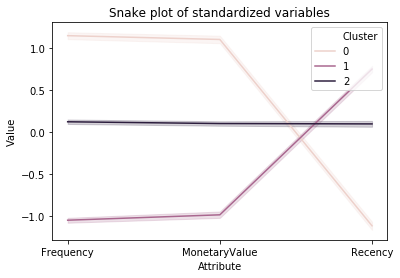

In [530]:
# Plotting the snakeplot

plt.title('Snake plot of standardized variables')

sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)

In the above graph, we can deduce the facts that cluster 1 has low frequency and monetary value, but high recency. They shop for a small value, but are very recent.

Cluster 0 is exact opposite of cluster 1.

Cluster 2 is low on all points. they have low frequency, shop for value and they do not often visit the site.